# Определение выгодного тарифа для телеком компании

## Описание проекта
Компания «Мегалайн» — федеральный оператор сотовой связи. Компания предлагает клиентам два тарифных плана: «Смарт» и «Ультра»:  
**Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.  
**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.  

Поступил запрос от коммерческого департамента на определение тарифа, который приносит больше денег. Данные анализа будут использоваться для корректировки рекламного бюджета.  
Для анализа предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## 1. Загрузка и общий анализ данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import warnings
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# получаем данные и сохраняем их в переменные
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv') 
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
# создаем функцию для просмотра общей информации по определенному набору данных
def dataframe_information(dataframe, q_rows): # datafreim - имя переменной, в которой сохранен интересующий набор данных, rows количество строк для просмотра
    display(dataframe.info())
    display(dataframe.head(q_rows))

In [4]:
# просмотр общей информации о звонках
dataframe_information(data_calls, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В наборе данных о звонках пользователей 202607 записей и 4 столбца: id записи, дата звонка, продолжительность, id абонента. Пропущенные данные в столбцах отсутствуют. Данные, содержащие дату звонка, имеют неверный формат. В дальнейшем необходимо будет преобразовать их к типу даты для возможности корректной обработки и анализа.

In [5]:
# просмотр общей информации об использовании интернета
dataframe_information(data_internet, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


В наборе данных об использовании интернета 149396 записей и 4 столбца: id записи, количество использованных мегабайт, дата расходования трафика, id абонента. Пропущенные данные в столбцах отсутствуют. Данные, содержащие дату расходования трафика, имеют неверный формат. В дальнейшем необходимо будет преобразовать их к типу даты для возможности корректной обработки и анализа.  
Кроме этого в наборе данных есть столбец Unnamed: 0, который дублирует столбец с индексом. Данный столбец можно будет удалить при исправлении ошибок в наборах данных.

In [6]:
# просмотр общей информации об отправленных сообщениях
dataframe_information(data_messages, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В наборе данных об отправленных сообщениях 123036 записей и 3 столбца: id записи, дата отправки сообщения, id абонента. Пропущенные данные в столбцах отсутствуют. Данные, содержащие дату отправки сообщения, имеют неверный формат. В дальнейшем необходимо будет преобразовать их к типу даты для возможности корректной обработки и анализа

In [7]:
# просмотр общей информации о тарифах
dataframe_information(data_tariffs, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В наборе данных о тарифах все значения указаны корректно. Количество столбцов соответствует описанным в начале проекта параметрам тарифов.

In [8]:
# просмотр общей информации о пользователях
dataframe_information(data_users, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В наборе данных с информацие о пользователях 500 записей. По каждому пользователю имеет следующая информация:
* id пользователя
* возраст
* дата прекращения пользования тарифом
* город
* фамилия и имя
* дата подключения тарифа
* наименование тарифа  

Большая часть пользователей из набора является действующими пользователями тарифов о чем свидетельствует только 38 непустых записей в столбце churn_date - дата прекращения пользования тарифом. Как и для наборов данных о звонках, интернет-трафике и сообщения, в текущем наборе некорректно указан тип для столбца даты начала пользования тарифом. Некорректный формат будет исправлен при подготовке данных к анализу. 

**Вывод**  
В первой части проекта была проведена оценка объема и корректности данных. Для анализа предоставлены данные по 500 пользователям, информация осовершенных звонках, использовании интернет-трафика и отправленных сообщениях. В целом данные пригодны для предварительных расчетов и анализа за исключением двух аспектов:  
1) некорректный формат столбца с датами в каждом из наборов данных;  
2) лишний столбец в наборе данных с интернет трафиком, который дублирует столбец с индексом.

На следующем этапе будет проведена подготовка данных к анализу: устранены ошибки в данных и рассчитаны дополнительные показатели для каждого пользователя.

## 2. Подготовка данных к анализу

### 2.1 Устранение ошибок в данных.

In [9]:
# Устраним лишний столбец в наборе данных об интернет трафике
data_internet = data_internet.drop(columns='Unnamed: 0')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Лишний столбец успешно удален, на следующем шаге исправим формат данных для столбцов с датами. Т.к. исправление формата требуется для всех наборов данных, создадим для этого функцию.

In [10]:
# функция исправления формата данных
def change_to_date(dataframe, column_name): # dataframe - массив данных, в котором есть столбцы с некорректным форматом, column_name - имя столбца с некорректным форматом
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])

In [11]:
# поменяем формат в столбцах с датами
change_to_date(data_calls, 'call_date')
change_to_date(data_internet, 'session_date')
change_to_date(data_messages, 'message_date')
change_to_date(data_users, 'reg_date')

Ошибки в данных успешно устранены. Следующим шагом рассчитаем дополнительные показатели по каждому пользователю.

### 2.2 Рассчет дополнительных показателей по каждому пользователю.

Для проведения дальнейшего анализа рассчитаем следующие дополнительные показатели по каждому пользователю:  
1) количество сделанных звонков и израсходованных минут разговора по месяцам;  
2) количество отправленных сообщений по месяцам;  
3) объем израсходованного интернет-трафика по месяцам;  
4) помесячную выручку с каждого пользователя.  

Для расчета показателей будем использовать сводные таблицы по каждому набору данных с последующим объдинением в единый набор данных. 

In [12]:
# создадим функцию для получения месяца совершения операции. dataframe - набор данных, в котором сохраняем месяц, column_name - столбец с информацией о датах
def get_month(dataframe, column_name):
    dataframe['month'] = dataframe[column_name].dt.month

In [13]:
# создаем в каждом наборе данных столбец с месяцем получения услуги
get_month(data_calls, 'call_date')
get_month(data_internet, 'session_date')
get_month(data_messages, 'message_date')

In [14]:
# пересчитываем объем использованных минут с учетом округлений компанией
data_calls['duration_calls'] = np.ceil(data_calls['duration'])

In [15]:
# пересчитываем объем использованного интернет-трафика с учетом округлений компанией
data_internet['duration_internet'] = (data_internet['mb_used'] / 1024).apply(np.ceil)

In [16]:
# сгруппируем данные в таблицах по пользователю и месяцу
calls = data_calls.groupby(['user_id', 'month']).agg({'duration_calls': 'sum'}).reset_index()
internet = data_internet.groupby(['user_id', 'month']).agg({'duration_internet': 'sum'}).reset_index()
messages = data_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id':'messages'}).reset_index()

In [17]:
# объединяем данные в одну таблицу
data_calls_internet = calls.merge(internet, on=['user_id', 'month'], how='outer')
data_all = data_calls_internet.merge(messages, on=['user_id', 'month'], how='outer')
data_all_users = data_all.merge(data_users, on=['user_id'], how='outer')
data_tariffs = data_tariffs.rename(columns={'tariff_name':'tariff'})
data_final = data_all_users.merge(data_tariffs, on=['tariff'], how='outer')

In [18]:
# просмотр итоговой таблицы
data_final.info()
data_final.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
duration_calls           3174 non-null float64
duration_internet        3203 non-null float64
messages                 2717 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: datetime6

,user_id,month,duration_calls,duration_internet,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,4.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,49.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,28.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,27.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,26.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10.0,350.0,28.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11.0,338.0,27.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12.0,333.0,19.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1003,8.0,380.0,14.0,37.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
9,1003,9.0,961.0,23.0,91.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1


In [48]:
data_final.user_id.nunique()

498

In [19]:
# удалим значения с пропусками в столбце month и преобразуем данные в этом столбце к целочисленному типу
data_final = data_final[~(data_final['month'].isna())]
data_final['month'] = data_final['month'].astype('int')
warnings.simplefilter('ignore')

In [20]:
# заполним пустые значения в столбцах duration_calls, duration_internet и messages
data_final['duration_calls'] = data_final['duration_calls'].fillna(0)
data_final['duration_internet'] = data_final['duration_internet'].fillna(0)
data_final['messages'] = data_final['messages'].fillna(0)

После проведенных преобразований данные готовы к расчету показателей помесячной выручки. Расчет показателя будет происходить в два этапа. На первом этапе будет рассчитана прибыль от потребления пользователями услуг сверх тарифа. На втором этапе будет подсчитана итоговая выручка, как сумма выручки от тарифного плана и вырчуки от потребления услуг сверх тарифа. 

In [21]:
# расчет оплаты услуг сверх тарифа
data_final['additional_payment_calls'] = (data_final['duration_calls'] - data_final['minutes_included']) * data_final['rub_per_minute']
data_final['additional_payment_internet'] = (data_final['duration_internet'] - data_final['mb_per_month_included'] / 1024) * data_final['rub_per_gb'] 
data_final['additional_payment_messages'] = (data_final['messages'] - data_final['messages_included']) * data_final['rub_per_message']

In [22]:
data_final.head(10)

,user_id,month,duration_calls,duration_internet,messages,age,churn_date,city,first_name,last_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,additional_payment_calls,additional_payment_internet,additional_payment_messages
0,1000,5,159.0,4.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2841.0,-3900.0,-978.0
1,1000,6,172.0,49.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2828.0,2850.0,-940.0
2,1000,7,340.0,28.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2660.0,-300.0,-925.0
3,1000,8,408.0,27.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2592.0,-450.0,-919.0
4,1000,9,466.0,26.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2534.0,-600.0,-943.0
5,1000,10,350.0,28.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2650.0,-300.0,-927.0
6,1000,11,338.0,27.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2662.0,-450.0,-942.0
7,1000,12,333.0,19.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,-2667.0,-1650.0,-930.0
8,1003,8,380.0,14.0,37.0,23,NaN,Москва,Белла,Белякова,...,1000,30720,3000,1950,150,1,1,-2620.0,-2400.0,-963.0
9,1003,9,961.0,23.0,91.0,23,NaN,Москва,Белла,Белякова,...,1000,30720,3000,1950,150,1,1,-2039.0,-1050.0,-909.0


По результатам рассчета сумм оплаты сверх тарифа видно, что многие значения получились отрицательные, что свидетельствует о том, что по конкретному направлению тариф не был израходован до конца. Отрицательные показатели доплаты заменим на нулевые значения.

In [23]:
# определим функцию для замены отрицательных значений на нулевые.
def change_payment_to_zero(column_name):
    data_final.loc[(data_final[column_name] < 0), column_name] = 0

In [24]:
# заменим отрицательные значения в столбцах дополнительной оплаты на нулевые
change_payment_to_zero('additional_payment_calls')
change_payment_to_zero('additional_payment_internet')
change_payment_to_zero('additional_payment_messages')

In [25]:
# рассчитаем полную стоимость оплаты за каждый месяц по каждому клиенту
data_final['total_payment'] = data_final['rub_monthly_fee'] + data_final['additional_payment_calls'] + data_final['additional_payment_internet'] + data_final['additional_payment_messages']

In [49]:
data_final['total_payment'].describe()

count     3214.000000
mean      5510.734599
std       2910.482219
min        550.000000
25%       3000.000000
50%       5550.000000
75%       7550.000000
max      19370.000000
Name: total_payment, dtype: float64

In [26]:
data_final.head(10)

,user_id,month,duration_calls,duration_internet,messages,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,additional_payment_calls,additional_payment_internet,additional_payment_messages,total_payment
0,1000,5,159.0,4.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,49.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,2850.0,0.0,4800.0
2,1000,7,340.0,28.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,27.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,26.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
5,1000,10,350.0,28.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
6,1000,11,338.0,27.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
7,1000,12,333.0,19.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
8,1003,8,380.0,14.0,37.0,23,NaN,Москва,Белла,Белякова,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
9,1003,9,961.0,23.0,91.0,23,NaN,Москва,Белла,Белякова,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


**Вывод**  
В изначальных данных были устранены выявленные ошибки: удален лишний столбец в наборе данных об использовании интернета, исправлен формат для даты использования услуг.  
Была сформирована таблица с информацией об использовании каждой услуги пользователями в разрезе по месяцам, а так же расчитан показатель выручки компании по каждому пользователю за каждый месяц.  
В следующем пункте будет проанализировано поведение клиентов: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. На основе этой информации будет проведен статистический анализ данных.

## 3. Статистический анализ данных

В данном разделе будет проведен статистический анализ данных, в рамках которого проанализируем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Для каждого типа услуги рассчитаем среднее значение, дисперсию, стандартное отклонение, а так же посмотрим на распределение данных по каждой услуге.

In [27]:
# рассчитаем количество пользователей на каждом тарифе
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Более чем 2/3 пользователей предпочитают тариф с меньшей оплатой и меньшим объемом услуг. На основании этого можно предположить, что среднее количество потребляемых услуг на тарифе "Смарт" будет ниже. Так же можно предполагать более низкую дисперсию и стандартное отклонение на тарифе "Смарт" поскольку стоимость дополнительного использования услуг выше, чем на тарифе "Ультра".  
Проверим данные предположения.

In [28]:
# создадим функцию для вывода статистических параметров и построения гистограммы
def tariff_stat(tariff, column_name):
    print('Дисперсия:', np.var(data_final.loc[data_final['tariff']==tariff, column_name], ddof=1))
    print()
    display(data_final.loc[data_final['tariff']==tariff, column_name].describe())
    data_final.loc[data_final['tariff']==tariff, column_name].plot(kind='hist', title = 'Гистограмма распределения ' + column_name)

In [29]:
# функция для построения графика плотности
def tariff_density(tariff, column_name):
    data_final.loc[data_final['tariff']==tariff, column_name].plot(kind='density', title = 'График плотности распределения ' + column_name)

### 3.1 Статистический анализ тарифа "Смарт"

Статистическая информация по звонкам пользователей
Дисперсия: 36219.31578434428



count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration_calls, dtype: float64

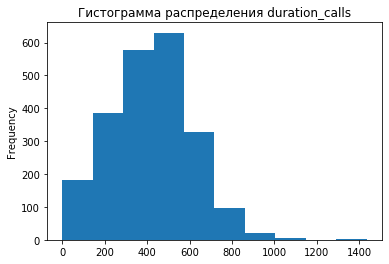

In [30]:
# рассчитаем основные статистические показатели по звонкам для пользователей тарифа "Смарт" и строим гистограмму
print('Статистическая информация по звонкам пользователей')
tariff_stat('smart', 'duration_calls')

Пользователи тарифа "Смарт" в среднем разговаривают 418 минут. Это почти совпадает с медианным значением - общая продолжительность разговоров 50% наблюдений не превышает 422 минуты. При этом более чем для 25% наблюдений общая продолжительность разговора первышает лимит установленный по тарифу, что так же подтверждается большим значением стандартного отклонения.  
Распределение данных по общему времени звонков смещено влево, что подтверждает изначальное предположение, что пользователи данного тарифа не тратят много времени на разговоры. 

Статистическая информация по интернет-трафику
Дисперсия: 223.2963679359641



count    2229.000000
mean       42.418125
std        14.943104
min         0.000000
25%        34.000000
50%        43.000000
75%        52.000000
max       101.000000
Name: duration_internet, dtype: float64

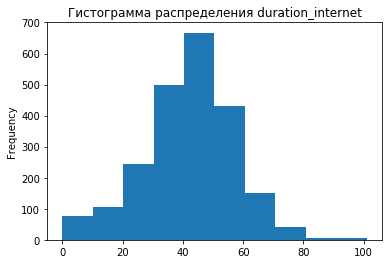

In [31]:
# рассчитаем основные статистические показатели по интернет трафику для пользователей тарифа "Смарт" и строим гистограмму
print('Статистическая информация по интернет-трафику')
tariff_stat('smart', 'duration_internet')

Средний объем использования интернета пользователями тарифа "Смарт" существенно превосходит объем заложенный в тарифе. Среднее и медианное значение равны 42 Гб. и 43 Гб. соответственно, что в почти в 3 раза превосходит доступный по тарифу объем трафика. На гистограмме видно, что менее чем в 100 наблюдениях объем использования интернета соответствовал тарифу. Учитывая, что данным тарифом пользуется большая часть пользователей и дополнительное количество трафика стоит дороже, чем на тарифе "Ультра", можно предположить большие поступления за эту услугу. 
Распределение данных как для и распределение для звонков смещено влево, но в данном случае оно более симметрично. Это отражает тот факт, что люди пользууются интернетом исходя из своих потребностей в меньшей оглядкой на тариф.

Статистическая информация по количеству сообщений
Дисперсия: 796.8129584480083



count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

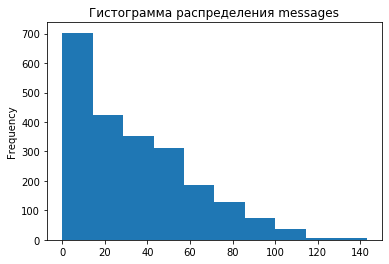

In [32]:
# рассчитаем основные статистические показатели по количеству сообщений для пользователей тарифа "Смарт" и строим гистограмму
print('Статистическая информация по количеству сообщений')
tariff_stat('smart', 'messages')

Распределение данных по количеству отправленных сообщений имеет сильное смещение вправо: пользователи мало пользуют услугой отправки сообщений, что вполне логично при наличии интернета и большого количества месенджеров. Для 75% наблюдений пакет сообщений из тарифа является достаточным, а для 50% наблюдений количество отпраленных в месяц сообщений не превышает 28.  
Учитывая развитие технологий и небольшую популярность сообщений, подобное распределение можно ожидать и для тарифа "Ультра".

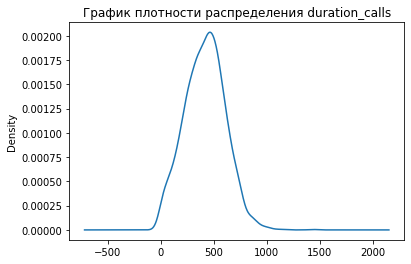

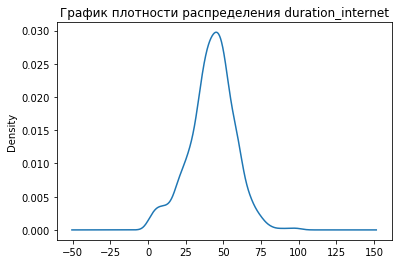

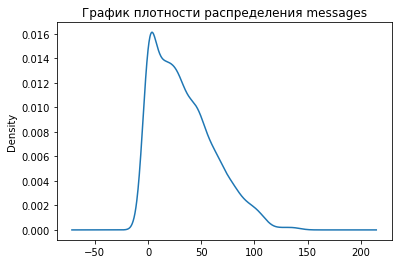

In [33]:
# построим графики плотности распределения для каждого параметра
tariff_density('smart', 'duration_calls')
plt.show()
tariff_density('smart', 'duration_internet')
plt.show()
tariff_density('smart', 'messages')

График плотности для общей длительности звонков и использования интернет трафика напоминает нормальное распределение, которое немного сжали с двух сторон. График плотности для количества оправленных сообщений имеет значительное отклонение от нормального, что, как было отмечено ранее, связано с низким использованием сервиса сообщений пользователями.

### 3.2 Статистический анализ тарифа "Ультра"

Статистическая информация по звонкам пользователей
Дисперсия: 100873.63339730098



count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration_calls, dtype: float64

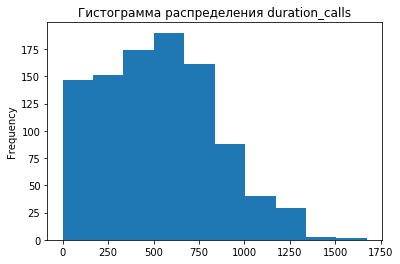

In [34]:
# рассчитаем основные статистические показатели по звонкам для пользователей тарифа "Ультра" и строим гистограмму
print('Статистическая информация по звонкам пользователей')
tariff_stat('ultra', 'duration_calls')

Как и предполагалось среднее значение общего объема звонков для тарифа "Ультра" выше. При этом данные так же смещены влево, что говорит о том, что объем разговоров не имеет строгой привязки к тарифу, а больше заивисит от поведения людей. Максимальная продолжительность разговоров в наборе данных составляет 1673 минуты, что почти в два раза меньше доступного объема в рамках тарифа. В части звонков на данном тарифе компания не будет получать дополнительной прибыли.

Статистическая информация по интернет-трафику
Дисперсия: 382.7757686434732



count    985.000000
mean      38.164467
std       19.564656
min        0.000000
25%       23.000000
50%       38.000000
75%       52.000000
max       98.000000
Name: duration_internet, dtype: float64

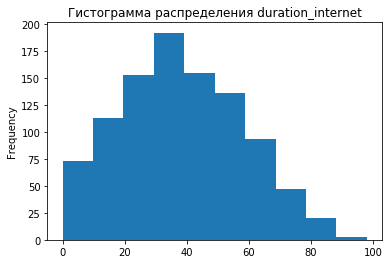

In [35]:
# рассчитаем основные статистические показатели по интернет трафику для пользователей тарифа "Смарт" и строим гистограмму
print('Статистическая информация по интернет-трафику')
tariff_stat('ultra', 'duration_internet')

Распределение потребления интернет трафика почти симметричное с небольшим смещением вправо. Среднее значение составляет 38 Гб, что совпадает с медианным значением. Данный факт так же подтверждает симметричность распределения. Среднее значение потребляемого трафика в месяц меньше, чем аналогичное значение для тарифа "Смарт".  
Примерно 30% наблюдений использования интернет трафика укладываются в лимит тарифного плана, в остальных случаях пользователи докупают дополнительный объем трафика. 
Т.к. ожидается небольшой объем сообщений, который должен будет находиться в рамках лимита тарифа, дополнительный интернет трафик является основным источником дополнительного дохода для компании.

Статистическая информация по количеству сообщений
Дисперсия: 2285.2661425446736



count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

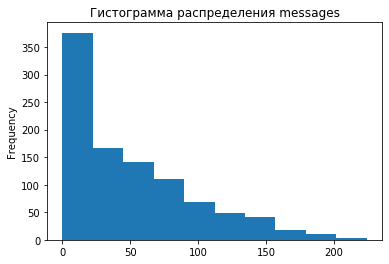

In [36]:
# рассчитаем основные статистические показатели по количеству сообщений для пользователей тарифа "Ультра" и строим гистограмму
print('Статистическая информация по количеству сообщений')
tariff_stat('ultra', 'messages')

Предположение о небольшом количестве отправленных сообщений подтвердилось. Как и для тарифа "Смарт" на тарифе ультра пользователи отправляют мало сообщений: большая часть данных сгруппирована возле нуля, а вцелом выборка смещена вправо. Максимальное количество сообщений, которое отправлялось в месяц составило 224, что существенно ниже лимита, установленного в рамках тарифа. Следовательно компания не будет получать дополнительный доход за сервис услуг.

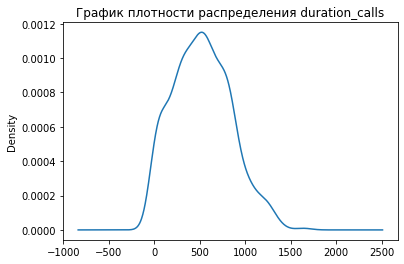

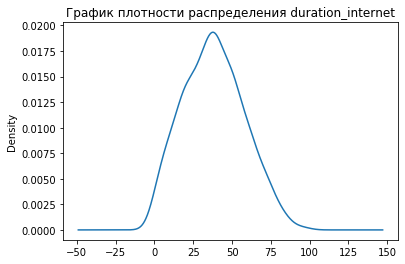

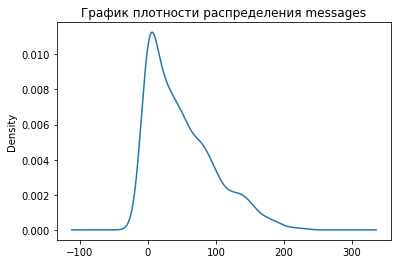

In [37]:
# построим графики плотности распределения для каждого параметра
tariff_density('ultra', 'duration_calls')
plt.show()
tariff_density('ultra', 'duration_internet')
plt.show()
tariff_density('ultra', 'messages')

График плотностей для общей продолжительности звонков и для использования интернет трафика напоминает график плотности нормального распределения немного сжатый с двух сторон. По причине сильной смещенности данных с количеством отправленных сообщений график плотности меньше всего напоминает нормальное распределение.

In [38]:
# создадим набор данных, который будет отражать статистические параметры по каждому тарифу
mean_call_s = data_final.loc[data_final['tariff']=='smart', 'duration_calls'].mean()
stdv_call_s = np.std(data_final.loc[data_final['tariff']=='smart', 'duration_calls'], ddof=1)
mean_internet_s = data_final.loc[data_final['tariff']=='smart', 'duration_internet'].mean()
stdv_internet_s =np.std(data_final.loc[data_final['tariff']=='smart', 'duration_internet'], ddof=1)
mean_message_s = data_final.loc[data_final['tariff']=='smart', 'messages'].mean()
stdv_message_s = np.std(data_final.loc[data_final['tariff']=='smart', 'messages'], ddof=1)

mean_call_u = data_final.loc[data_final['tariff']=='ultra', 'duration_calls'].mean()
stdv_call_u = np.std(data_final.loc[data_final['tariff']=='ultra', 'duration_calls'], ddof=1)
mean_internet_u = data_final.loc[data_final['tariff']=='ultra', 'duration_internet'].mean()
stdv_internet_u =np.std(data_final.loc[data_final['tariff']=='ultra', 'duration_internet'], ddof=1)
mean_message_u = data_final.loc[data_final['tariff']=='ultra', 'messages'].mean()
stdv_message_u = np.std(data_final.loc[data_final['tariff']=='ultra', 'messages'], ddof=1)

data_stat = pd.DataFrame({'parameters':['mean_calls', 'stdv_calls', 'mean_internet', 'stdv_internet', 'mean_messages', 'stdv_messages'], 'smart':[mean_call_s, stdv_call_s, mean_internet_s, stdv_internet_s, mean_message_s, stdv_message_s], 'ultra':[mean_call_u, stdv_call_u, mean_internet_u, stdv_internet_u, mean_message_u, stdv_message_u]})

**Вывод**  
В данном разделе были проанализированы основные статистические показатели по данным об общем объеме звонков, использовании интернет трафика и использовании сервиса сообщений. В таблице ниже представленны данные показатели в разрезе тарифов:


In [39]:
display(data_stat.round(2))

,parameters,smart,ultra
0,mean_calls,417.93,526.62
1,stdv_calls,190.31,317.61
2,mean_internet,42.42,38.16
3,stdv_internet,14.94,19.56
4,mean_messages,33.38,49.36
5,stdv_messages,28.23,47.80


Из таблицы видно, что средний объем потребления на тарифе "Ультра" выше, чем на тарифе "Смарт". Исключение составляет только использование интернет трафика, которое выше на тарифе "Смарт". Более высокое среднее значение на тарифе "Ультра" выглядит вполне логичным т.к. он предлагает больший объем услуг в рамках абонетской платы и абоненты, выбирающие его предполагают, что будут больше общаться.  
При этом оба тарифа схожи в том, что использование интернет трафика на каждом из тарифов превышает квоту выделенную в рамках абонентской платы. Пользователи тарифа "Смарт" примерно в 30% наблюдений оплачивают дополнительные минуты разговора.  
Помимо более высоких средних значений, для данных с тарифа "Ультра" характерен больший разброс данных, но данный факт связан с тем, что выборка пользователей тарифа "Ультра" более чем в два раза меньше выборки пользователей с тарифом "Смарт".

В следующем разделе проверим различается ли выручка, которую получает компания, в зависимости от тарифа. Так же проверим различается ли выручка, которую приносят пользователи Москвы и пользователи остальных регионов в совокупности.

## 4. Проверка статистических гипотез

В этом разделе будет проведена проверка двух гипотез:  
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### 4.1 Проверка гипотезы о различии выручки для тарифов "Ультра" и "Смарт"

Статистический анализ показал, что пользователи тарифа "Смарт" чаще платят за услуги вне тарифа. При этом для пользователей тарифа "Ультра" существенно выше абонентская плата за тариф. Для проверки того, какой из тарифов приносит больше выручки, сформулируем основную и альтернативную гипотезу:  
Н0 (основная гипотеза): выручка, которую приносят пользователи тарифа "Смарт" равна выручке, которую приносят пользователи тарифа "Ультра"  
Н1 (альтернативная гипотеза): выручка по тарифу "Смарт" больше выручки по тарифу "Ультра".  

В данном случае мы проверяем одностороннюю альтернативную гипотезу т.к. нам необходимо выделить более доходный тариф.  
Критический уровень статистической значимости - 0,05  
Для проверки гипотезы будет использовать односторонний критерий Стьюдента.

Прежде чем проверять гипотезу необходимо посмотреть дисперсии данных о выручке для двух тарифов. Различие значений дисперсии повлияет на результат проверки гипотезы.

In [40]:
# рассчитаем дисперсию выручки по каждому тарифу
var_profit_s = np.var(data_final.loc[data_final['tariff']=='smart', 'total_payment'])
print('Дисперсия выручки для тарифа "Смарт":', var_profit_s)
var_profit_s = np.var(data_final.loc[data_final['tariff']=='ultra', 'total_payment'])
print('Дисперсия выручки для тарифа "Ультра":', var_profit_s)

Дисперсия выручки для тарифа "Смарт": 8369844.454976924
Дисперсия выручки для тарифа "Ультра": 4687395.217604165


Дисперсии существенно различаются, но как раньше было замечено это связано с тем, что выборки имеют разный размер. Построим график плотности расрпеделения выручки для каждого тарифа, чтобы сравнить похожесть распределения.

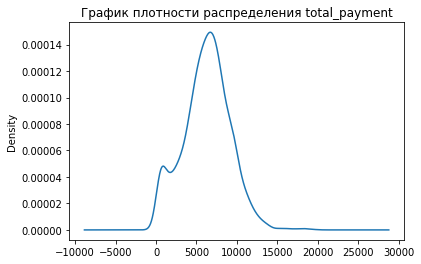

In [41]:
# плотность распределения выручки для тарифа "Смарт"
tariff_density('smart', 'total_payment')

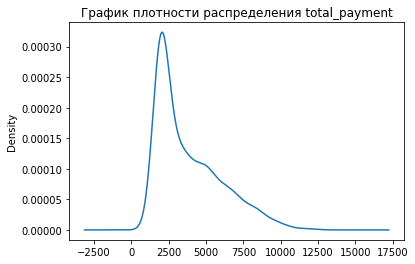

In [42]:
# плотность распределения выручки для тарифа "Ультра"
tariff_density('ultra', 'total_payment')

Распределение выручки по тарифу "Ультра" значительно отличается от распределения выручки по тарифу "Смарт". Поэтому для проверки гипотез будем устанавливать параметр о различии дисперсий.

In [43]:
# Проверка гипотезы о равенстве выручки на двух разных тарифах
alpha = 0.05
data_final_smart = data_final.loc[data_final['tariff']=='smart', 'total_payment']
data_final_ultra = data_final.loc[data_final['tariff']=='ultra', 'total_payment']

results_tariffs = st.ttest_ind(data_final_smart, data_final_ultra, equal_var = False)
print('p-значение:', results_tariffs.pvalue / 2)
if results_tariffs.pvalue / 2 < alpha & data_final_ultra.mean() < data_final_smart.mean():
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.683061608459537e-132
Отвергаем нулевую гипотезу


Вероятность того, что средняя выручка по тарифу "Смарт" равна средней выручке по тарифу "Ультра" крайне мала. Статистическая проверка гипотезы подтвердила выводы сделанные на основе визуального и статистического анализа данных: клиенты тарифа "Смарт" приностя компании гораздо больший доход. 

### 4.2 Проверка гипотезы о различии выручки для Москвы и других городов

Москва - крупнейший город в России и центр деловой жизни. Люди много пользуются услугами сотовых операторов для работы, учебы, развлечения, поэтому можно предположить, что люди тратят на связь больше и больше выручки приносят компании.
Сформулируем гипотезы, которые будем проверять:
Н0 (основная гипотеза): выручка, которую приносят пользователи в Москве, которую приносят пользователи в других городах  
Н1 (альтернативная гипотеза): выручка в Москве больше выручки от пользователей в других городах.  

В данном случае мы проверяем одностороннюю альтернативную гипотезу т.к. нам необходимо выделить более доходные регионы.  
Критический уровень статистической значимости - 0,05.  
Для проверки гипотезы будет использовать односторонний критерий Стьюдента.

Прежде чем проверять гипотезу необходимо посмотреть дисперсии данных о выручке для двух регионов. Различие значений дисперсии повлияет на результат проверки гипотезы.

In [44]:
# рассчитаем дисперсию выручки по каждому тарифу
var_profit_s = np.var(data_final.loc[data_final['city']=='Москва', 'total_payment'])
print('Количество наблюдений для Москвы:', data_final.loc[data_final['city']=='Москва', 'total_payment'].count())
print('Дисперсия выручки для Москвы:', var_profit_s)
var_profit_s = np.var(data_final.loc[~(data_final['city']=='Москва'), 'total_payment'])
print('Количество наблюдений для регионов:', data_final.loc[~(data_final['city']=='Москва'), 'total_payment'].count())
print('Дисперсия выручки для остальных регионов:', var_profit_s)

Количество наблюдений для Москвы: 611
Дисперсия выручки для Москвы: 7188012.265101615
Количество наблюдений для регионов: 2603
Дисперсия выручки для остальных регионов: 8765038.829366334


Дисперсии выборок относительно похожи друг на друга. Посмотрим графики плотностей для каждой группы наблюдений.

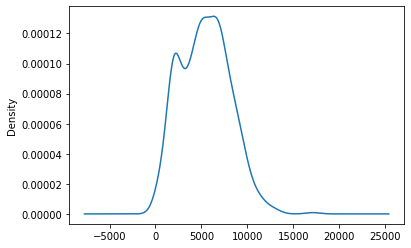

In [45]:
# плотность распределения выручки для Москвы
data_final.loc[data_final['city']=='Москва', 'total_payment'].plot(kind='density')

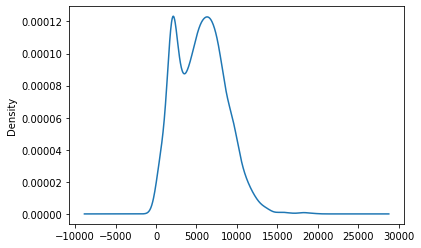

In [46]:
# плотность распределения выручки для Москвы
data_final.loc[~(data_final['city']=='Москва'), 'total_payment'].plot(kind='density')

Распределения очень похожи по форме, поэтому для проверки гипотез будем устанавливать параметр об одинаковости дисперсии для двух выборок.

In [47]:
# Проверка гипотезы о равенстве выручки на двух разных тарифах
alpha = 0.05
data_final_moscow = data_final.loc[data_final['city']=='Москва', 'total_payment']
data_final_other = data_final.loc[~(data_final['city']=='Москва'), 'total_payment']

results_tariffs = st.ttest_ind(data_final_moscow, data_final_other, equal_var = True)
print('p-значение:', results_tariffs.pvalue / 2)
if results_tariffs.pvalue / 2 < alpha & data_final_moscow.mean() > data_final_other.mean():
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14168232303286007
Не получилось отвергнуть нулевую гипотезу


Из полученных результатов следует, что нет оснований отклонить нулевую гипотезу. Средняя выручка, получаемая от пользователей в Москве, не сильно отличается от выручки, которую приносят пользователи из других регионов.

**Вывод**  
Для выявления более доходного тарифа были проверены две гипотезы:  
1) выручка от тарифа "Смарт" равна выручке от тарифа "Ультра";  
2) выручка от пользователей в Москве равна выручке в других регионах.

Вероятность того, что средняя выручка по тарифу "Смарт" равна выручке по тарифу "Ультра", крайне мала. Средний доход по тарифу "Смарт" превышает средний доход по тарифу "Ультра", т.к. пользователи тарифа "Смарт" используют много дополнительного интернет трафика, который стоит дороже, чем на тарифе "Ультра".  
При сравнении средней выручки в Москве и регионах не выявлено оснований отклонить гипотезу о равенстве выручки в Москве и регионах. 

## 5. Итоговые выводы

Для анализа были предоставлены данные оператора сотовой связи по потреблению услуг пользователями. Данные собраны по 500 пользователям за 2018 год.
Требовалось провести анализ для выявления наиболее доходного тарифа из двух.  
В ходе предварительного анализа данных был выявлен лишний столбец данных и некорректный формат дат совершения операций. Во время предобрабтки данных были устранены выявленные ошибки и сформирован итоговый набор данных для анализа, который содержит информацию по всем услугам в разрезе пользователей и месяцев.  

В рамках статистического анализа были исследованы данные о распределени данных об объеме звонков, использованного трафика, отправленных смс. Количество использованых минут и сообщений в рамках каждого тарифа в основном не превосходит установленные лимиты. Средний объем интернет трафика в рамках каждого из тарифов примерно одинаковый, но в случае тарифа "Смарт" объем потребляемого интернет трафика значительно превосходит лимит в рамках тарифа. Так же дополнительный трафик на тарифе "Смарт" стоит дороже. Всё это возволило сформировать гипотезу о том, что доход от тарифа "Смарт" выше чем доход от тарифа "Ультра".  
Проверка гипотезы о равенстве среднего дохода от разных тарифов не дала значимых результатов: доходы по каждому трифу сильно различаются между собой. При этом не нашлось оснований отвергнуть гипотезу о том, что доход от пользователей в Москве и других регионах одинаковый.

На основании всего вышеизложенного коммерческому департаменту компании "Мегалайн" предлагаются следующие рекомендации:  
* рекламную компанию направить на продвижение тарифа "Смарт";
* в виду отсутствия существенного различия между средним доходом от тарифов в Москве и регионах рекламную компанию стоит продвигать в регионах с наименьшей стоимостью рекламы;